In [1]:
algorithm_names = ["exampleindependent", "exampleshared"]
max_num_cores = 4
data_string = "dense_data2"
problem_type = "linearregression"

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import itertools

In [3]:
def get_dirname(algo_name):
    return "%s_%s_%s" % (algo_name, problem_type, data_string)

In [4]:
def get_execution_time_for_cores(algo_name, num_cores):
    filename = get_dirname(algo_name) + "/" + "threadstats_%dthread.csv" % num_cores
    real_time = -1.0
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file)
        header_row = next(csv_reader)
        main_row = next(csv_reader)
        real_time = float(main_row[1])
    return real_time

def get_execution_times(algo_name, maximum_num_cores):
    result = []
    for n in range(1, maximum_num_cores+1):
        result.append(get_execution_time_for_cores(algo_name, n))
    return result

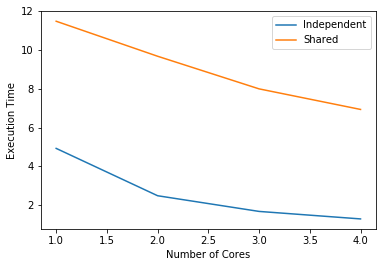

In [5]:
indep_exe_time_vs_cores = get_execution_times("exampleindependent", max_num_cores)
shared_exe_time_vs_cores = get_execution_times("exampleshared", max_num_cores)

num_cores = range(1, max_num_cores+1)
plt.plot(num_cores, indep_exe_time_vs_cores, label="Independent")
plt.plot(num_cores, shared_exe_time_vs_cores, label="Shared")
plt.xlabel('Number of Cores')
plt.ylabel('Execution Time')
plt.legend()
plt.show()

In [6]:
indep_speedup_vs_cores = [indep_exe_time_vs_cores[0] / t for t in indep_exe_time_vs_cores]
shared_speedup_vs_cores = [shared_exe_time_vs_cores[0] / t for t in shared_exe_time_vs_cores]

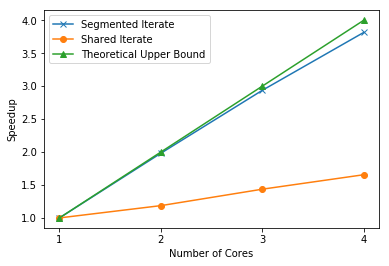

In [7]:
markers = itertools.cycle(('x', 'o', '^', '+', '.', '*'))
plt.plot(num_cores, indep_speedup_vs_cores, label="Segmented Iterate", marker=next(markers))
plt.plot(num_cores, shared_speedup_vs_cores, label="Shared Iterate", marker=next(markers))
plt.plot(num_cores, num_cores, label="Theoretical Upper Bound", marker=next(markers))
plt.xticks(num_cores)
plt.xlabel('Number of Cores')
plt.ylabel('Speedup')
# plt.title('Example Algorithms, Shared vs. Segmented Iterate')
plt.legend()
plt.show()